In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
print(list(dict(Base.classes)))

['measurement', 'station']


In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station



In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:

# Find the most recent date in the data set.
recent_date = session.query(func.max(measurement.date)).scalar()

print(recent_date)

2017-08-23


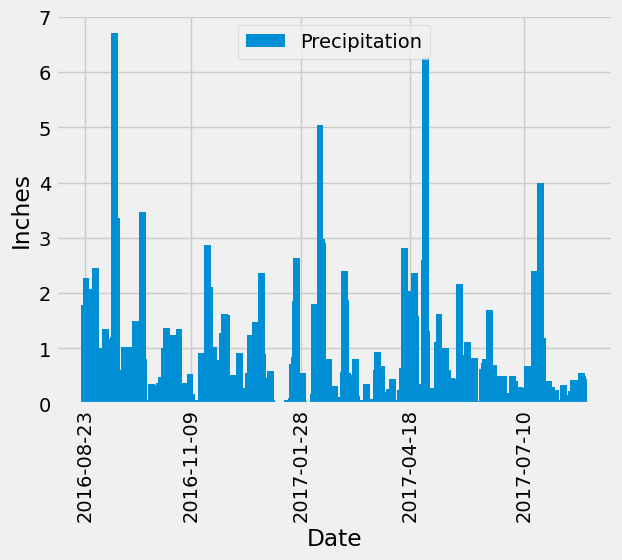

In [139]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = session.query(func.max(measurement.date)).scalar()
recent_date = dt.datetime.strptime(recent_date, "%Y-%m-%d")

# Calculate the date one year from the last date in data set.
one_year_later = recent_date - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date>=one_year_later.date())

# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(data=results, columns=('Date','Precipitation'))
df.dropna(inplace=True)
# Sort the dataframe by date
df.sort_values(by='Date', inplace=True)


# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(df['Date'], df['Precipitation'],width=5, align='center', label='Precipitation' )
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(loc='upper center')
ticks_label =['2016-08-23', '2016-11-09', '2017-01-28','2017-04-18', '2017-07-10']
plt.xticks(ticks_label)
plt.tick_params(axis='x', rotation=90)


In [50]:
# Use Pandas to calculate the summary statistics for the precipitation data
df['Precipitation'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [72]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(station.station)).scalar()
print(total_stations)

9


In [74]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_stations = session.query(measurement.station, func.count(measurement.station).label('measurement_count')
                               ).group_by(measurement.station).order_by(desc('measurement_count')).all()

print(active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [105]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
from sqlalchemy import select
results = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)
                                 ).where(measurement.station == active_stations[0][0]).all()
print(results)

[(54.0, 85.0, 71.66378066378067)]


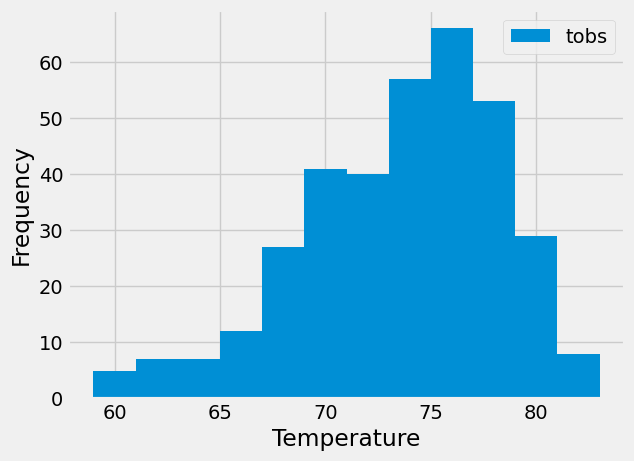

In [130]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
recent_date = session.query(func.max(measurement.date)).scalar()
recent_date = dt.datetime.strptime(recent_date, "%Y-%m-%d")

# Calculate the date one year from the last date in data set.
one_year_later = recent_date - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
# results = session.scalars(select(measurement.tobs).filter(measurement.date>=one_year_later.date())).all()
results = session.query(measurement.tobs).filter(measurement.date>=one_year_later.date(), measurement.station == active_stations[0][0]).all()

df = pd.DataFrame(data=results, columns=('Temperature',))

# Sort the dataframe by date
# Create a histogram
plt.hist(df, bins=12, label='tobs')  # 'bins' specify the number of bins or ranges
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Close Session

In [10]:
# Close Session
session.close()

NameError: name 'session' is not defined